<a href="https://colab.research.google.com/github/sergekamanzi/Water-Quality-Model/blob/Purity/Purity_Kihiu_formative_II_starter_code1_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Excercise - Creating our own custom Model

This is a notebook that provides a quick overview of how to create your own custom model. You will be creating a simple model.
You will be utilizing Keras and Tensorflow


## Water Quality Dataset

This dataset contains water quality measurements and assessments related to potability, which is the suitability of water for human consumption. The dataset's primary objective is to provide insights into water quality parameters and assist in determining whether the water is potable or not. Each row in the dataset represents a water sample with specific attributes, and the "Potability" column indicates whether the water is suitable for consumption.

https://www.kaggle.com/datasets/uom190346a/water-quality-and-potability?select=water_potability.csv


In [163]:
import tensorflow as tf
import numpy as np
import pandas as pd
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Input
from tensorflow.keras.regularizers import l2
from sklearn.metrics import f1_score
from sklearn.datasets import make_classification
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam, RMSprop, SGD
from matplotlib import pyplot
import keras
from imblearn.over_sampling import SMOTE
from sklearn.utils.class_weight import compute_class_weight

In [164]:
#LOAD THE DATA
df = pd.read_csv("/content/water_potability.csv")
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [165]:
df.isnull().sum()

,0
ph,491
Hardness,0
Solids,0
Chloramines,0
Sulfate,781
Conductivity,0
Organic_carbon,0
Trihalomethanes,162
Turbidity,0
Potability,0


In [166]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [167]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [168]:
df.fillna(df.mean(), inplace=True)
df.isnull().sum()

,0
ph,0
Hardness,0
Solids,0
Chloramines,0
Sulfate,0
Conductivity,0
Organic_carbon,0
Trihalomethanes,0
Turbidity,0
Potability,0


In [169]:
df.Potability.value_counts()

,count
Potability,
0,1998
1,1278


<ipython-input-170-48fab1294798>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['ph'])


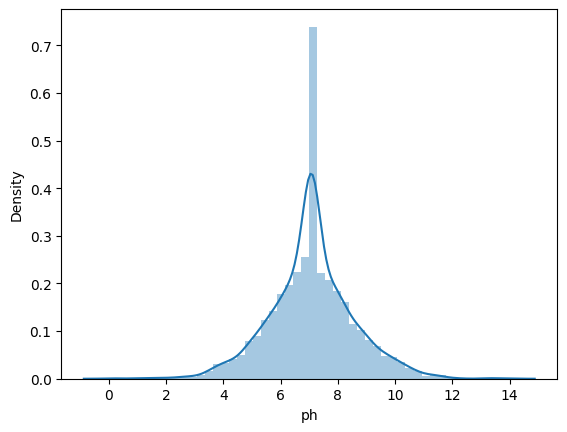

In [170]:
sns.distplot(df['ph'])
plt.show()

In [182]:
# Split into features (X) and target (Y)
X_data = df.drop(columns=["Potability"])
Y_data = df["Potability"]

In [183]:
# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_data)

Plot the Data Appropriately

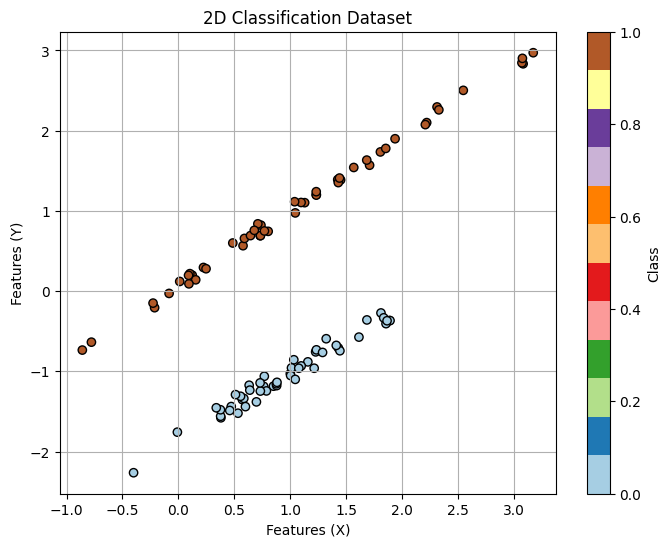

In [184]:
# generate 2d classification dataset
X, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=42)
# Plot the dataset
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, edgecolors='k')
plt.title('2D Classification Dataset')
plt.xlabel('Features (X)')
plt.ylabel('Features (Y)')
plt.colorbar(label='Class')
plt.grid(True)
plt.show()

In [185]:
# Split into training (70%), validation (15%), and testing (15%)
X_train, X_temp, Y_train, Y_temp = train_test_split(
    X_scaled, Y_data, test_size=0.3, random_state=42, stratify=Y_data
)
X_val, X_test, Y_val, Y_test = train_test_split(
    X_temp, Y_temp, test_size=0.5, random_state=42, stratify=Y_temp
)


In [175]:
# # Split into training (70%), validation (15%), and testing (15%)
# X_train, X_temp, Y_train, Y_temp = train_test_split(X_scaled, Y_data, test_size=0.3, random_state=42, stratify=Y)
# X_val, X_test, Y_val, Y_test = train_test_split(X_temp, Y_temp, test_size=0.5, random_state=42, stratify=Y_temp)

# Each Memeber Defines their model Here

In [198]:
def build_model_5():
    model = Sequential([
        Input(shape=(X_train.shape[1],)),  # Define input shape using Input layer
        Dense(128, activation="relu", kernel_regularizer=l2(0.005)),
        Dense(64, activation="relu", kernel_regularizer=l2(0.005)),
        # Output layer for binary classification
        Dense(1, activation='sigmoid')  # Use sigmoid for binary classification
    ])

    # Compile the model using SGD optimizer and binary_crossentropy loss
    model.compile(optimizer=RMSprop(learning_rate=0.001),
                  loss="binary_crossentropy",
                  metrics=["accuracy"])

    return model

In [199]:
model_5 = build_model_5()
# Calculate class weights for weighted loss
class_weights = compute_class_weight('balanced', classes=np.unique(Y_train), y=Y_train)
class_weights_dict = {0: class_weights[0], 1: class_weights[1]}

In [200]:
# Early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history_1 = model_5.fit(X_train, Y_train, validation_data=(X_val, Y_val),
                        epochs=400, batch_size=64, callbacks=[early_stopping],
                        verbose=1, class_weight=class_weights_dict)

Epoch 1/400
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.5418 - loss: 1.1394 - val_accuracy: 0.6273 - val_loss: 1.0050
Epoch 2/400
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6392 - loss: 0.9724 - val_accuracy: 0.6456 - val_loss: 0.8972
Epoch 3/400
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6767 - loss: 0.8645 - val_accuracy: 0.5499 - val_loss: 0.8465
Epoch 4/400
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6470 - loss: 0.7999 - val_accuracy: 0.6069 - val_loss: 0.7886
Epoch 5/400
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6606 - loss: 0.7491 - val_accuracy: 0.6314 - val_loss: 0.7533
Epoch 6/400
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6725 - loss: 0.7271 - val_accuracy: 0.6334 - val_loss: 0.7368
Epoch 7/400
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6633 - loss: 0.7100 - val_accuracy: 0.6477 - val_loss: 0.7177
Epoch 8/400
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6859 - loss: 0.6849 - val_accuracy: 0.6375 - 

# Start the training Process

Train Accuracy: 0.707, Test Accuracy: 0.679
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Test Accuracy: 0.679, F1 Score: 0.5611


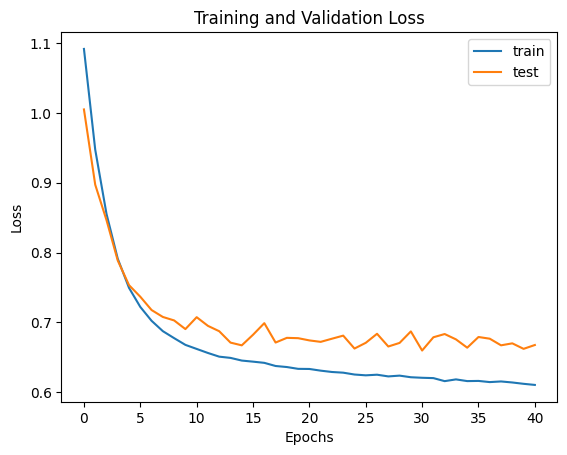

In [201]:
# Step 6: Evaluate the model
_, train_acc = model_5.evaluate(X_train, Y_train, verbose=0)
_, test_acc = model_5.evaluate(X_test, Y_test, verbose=0)
print(f'Train Accuracy: {train_acc:.3f}, Test Accuracy: {test_acc:.3f}')

# Generate predictions
y_pred_prob = model_5.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

# Calculate F1 score
f1 = f1_score(Y_test, y_pred)
# Print F1 score and test accuracy together
print(f'Test Accuracy: {test_acc:.3f}, F1 Score: {f1:.4f}')

# Step 7: Plot training history
plt.plot(history_1.history['loss'], label='train')
plt.plot(history_1.history['val_loss'], label='test')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
pyplot.show()

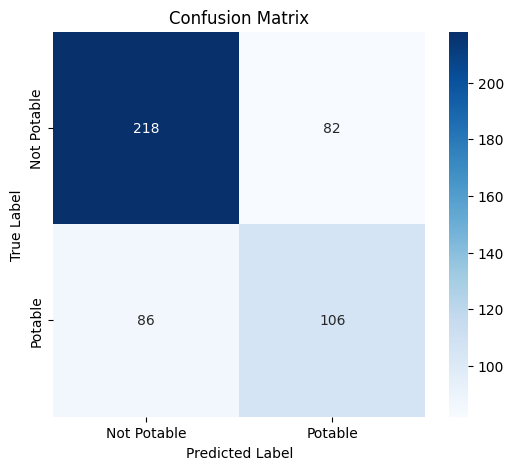

In [190]:
# Compute and plot confusion matrix
conf_matrix = confusion_matrix(Y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Not Potable", "Potable"],
            yticklabels=["Not Potable", "Potable"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()